# **Tarea 3**

Para cada audio generado en la tarea 2 (item 1 realizado en Tarea 2 )
    Realice un análisis análogo al item anterior pero con mejor resolución en frecuencia. Justifique y comente diferencias encontradas.

    Que longitud tienen las ventanas utilizadas en los items 2 y 3? pasadas a segundos?

✅ **Llevar a memoria en Colab, Extraer el VECTOR de muestras de la señal, la frecuencia de muestreo (Fr), la cantidad de muestras (M), la duración de la señal (en segundos) y Grafique la señal en función del tiempo discretizado.**

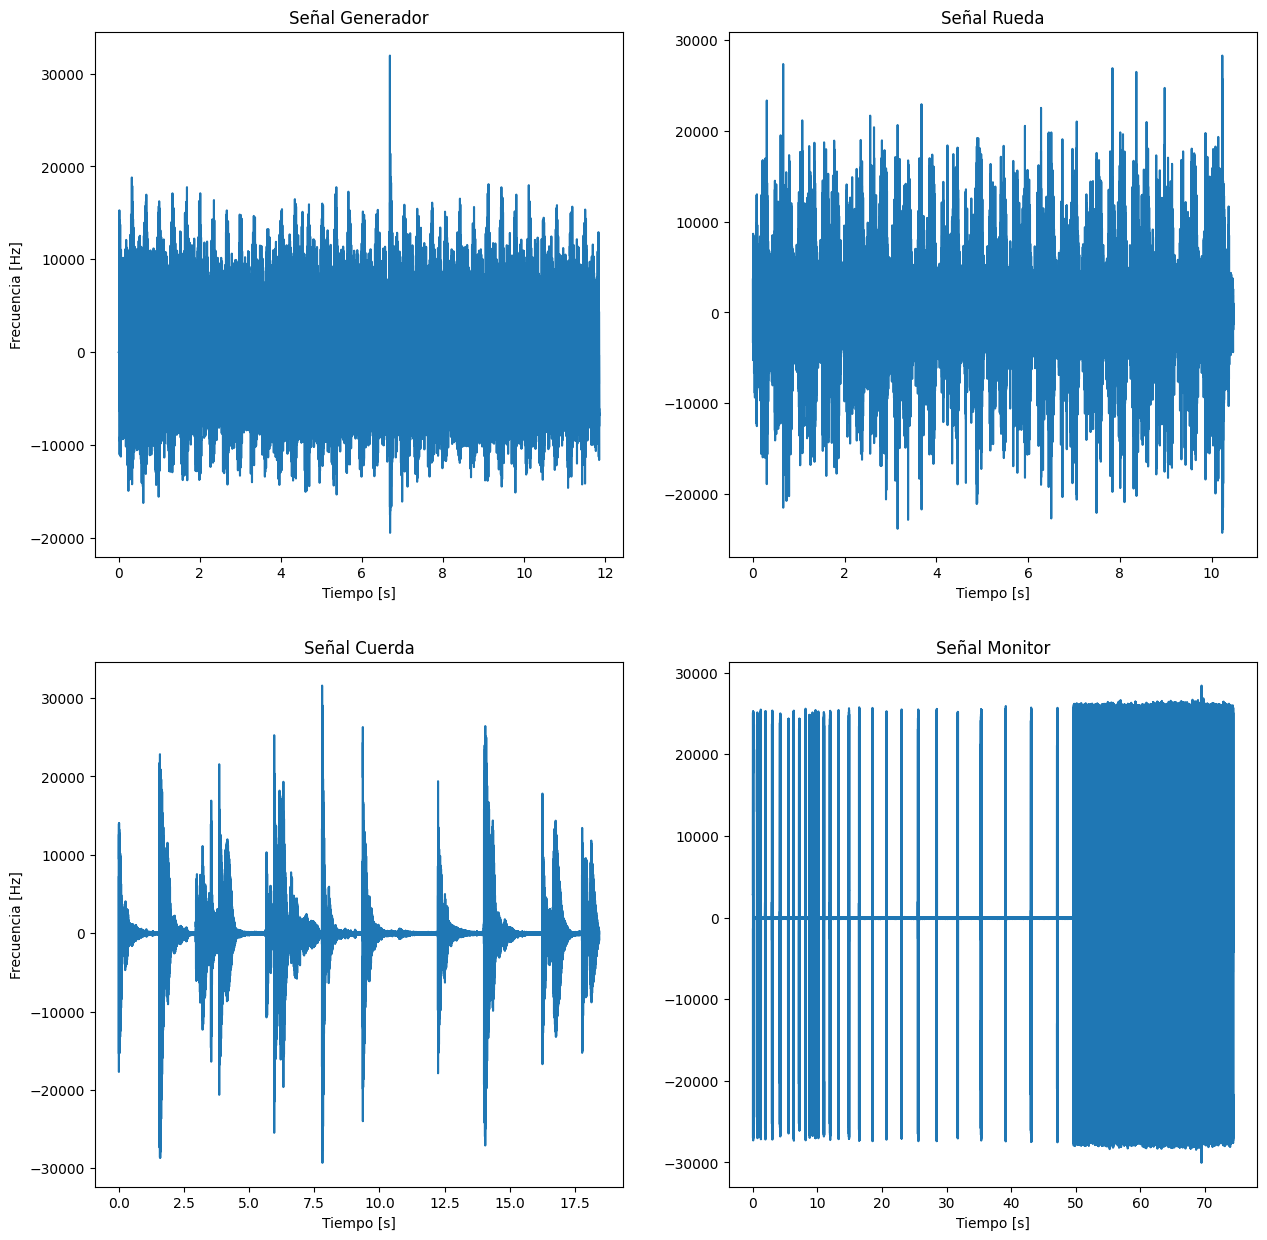

In [32]:
import numpy as np 
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal

au1 = read('1generador.wav')
#print(au1)
Fr1 = au1[0] # frecuencia de muestreo en Hz para el audio
A1 = au1[1][:,0] # seleccionamos todas las filas en la columna 0 (para seleccionar un canal de audio)
M1 = len(A1)
# para calcular el tiempo discretizado usamos regla de 3 simple
# si Fr1 ---- 1s => M1 ---- x
td1 = np.arange(0,M1)/Fr1
#print(td1)

au2 = read('2rueda.wav')
Fr2 = au2[0] # frecuencia de muestreo en Hz para el audio
A2 = au2[1][:,0] # seleccionamos todas las filas en la columna 0 (para seleccionar un canal de audio)
M2 = len(A2)
td2 = np.arange(0,M2)/Fr2

au3 = read('3cuerda.wav')
Fr3 = au3[0] # frecuencia de muestreo en Hz para el audio
A3 = au3[1][:,0] # seleccionamos todas las filas en la columna 0 (para seleccionar un canal de audio)
M3 = len(A3)
td3 = np.arange(0,M3)/Fr3

au4 = read('4monitor.wav')
Fr4 = au4[0] # frecuencia de muestreo en Hz para el audio
A4 = au4[1][:,0] # seleccionamos todas las filas en la columna 0 (para seleccionar un canal de audio)
M4 = len(A4)
td4 = np.arange(0,M4)/Fr4

# Graficamos

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("Señal Generador")
plt.ylabel("Frecuencia [Hz]")
plt.xlabel("Tiempo [s]")
plt.plot(td1, A1)

plt.subplot(222)
plt.title("Señal Rueda")
plt.plot(td2, A2)
plt.xlabel("Tiempo [s]")

plt.subplot(223)
plt.title("Señal Cuerda")
plt.ylabel("Frecuencia [Hz]")
plt.xlabel("Tiempo [s]")
plt.plot(td3, A3)

plt.subplot(224)
plt.title("Señal Monitor")
plt.xlabel("Tiempo [s]")
plt.plot(td4, A4)

plt.show()

**Graficar el espectrograma de la señal de audio (en función del tiempo y frecuencia en Hertz) utilizando una ventana Hamming de longitud 10001, DFT punto N=Fr cantidad de muestras en 1s y un <mark>solapado del 10%</mark>. Analice los resultados. Puede decir que la señal es estacionaria? Justifique.**

(cantidad de muestras en un segundo => frecuencia)
Preguntar: solapado del 10%??

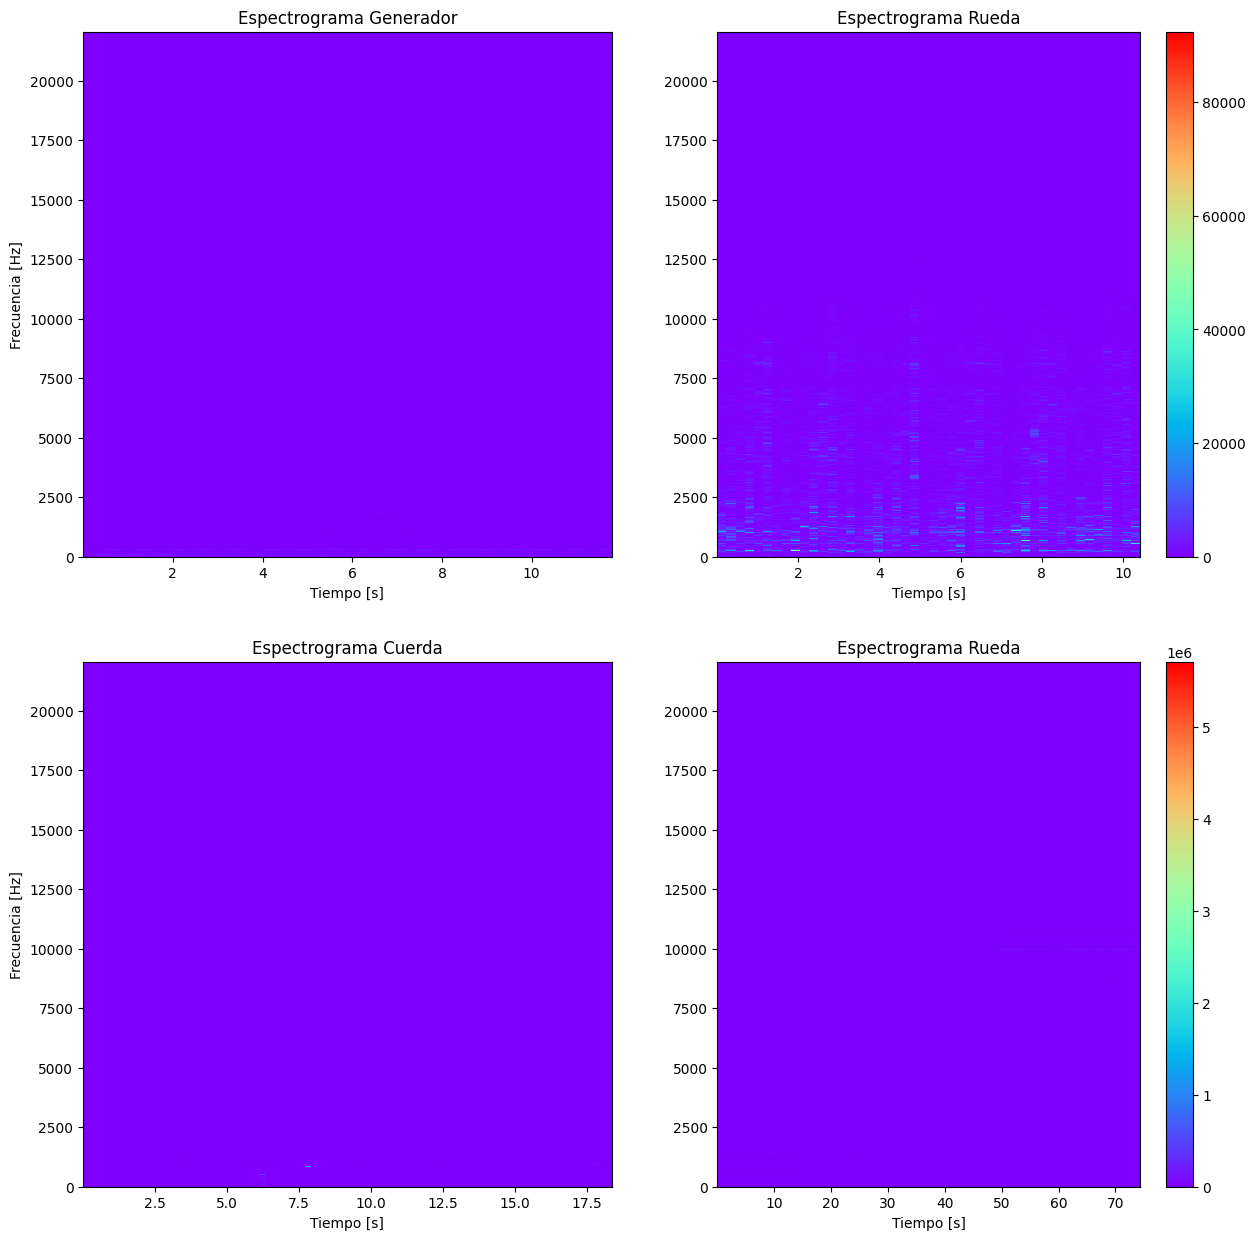

In [42]:
vhamming = signal.hamming(10001)

# Calculamos espectrogramas para cada señal
f1, t1, Sxx1 = signal.spectrogram(A1, fs=Fr1, window=vhamming, nfft=None, noverlap=10) # espectrograma para la señal 1
f2, t2, Sxx2 = signal.spectrogram(A2, fs=Fr2, window=vhamming, nfft=None, noverlap=10) # espectrograma para la señal 2
f3, t3, Sxx3 = signal.spectrogram(A3, fs=Fr3, window=vhamming, nfft=None, noverlap=10) # espectrograma para la señal 3
f4, t4, Sxx4 = signal.spectrogram(A4, fs=Fr4, window=vhamming, nfft=None, noverlap=10) # espectrograma para la señal 4

# Calculamos DFT para cada señal
dft1 = fft(A1, Fr1) # señal A1, N=Fr1 (N igual a Fr1) como la frecuencia es en 1s queda así
dft2 = fft(A2, Fr2) # ídem
dft3 = fft(A3, Fr3) # ídem
dft4 = fft(A4, Fr4) # ídem

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("Espectrograma Generador")
plt.pcolormesh(t1, f1, Sxx1, cmap='rainbow')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')

plt.subplot(222)
plt.title("Espectrograma Rueda")
plt.pcolormesh(t2, f2, Sxx2, cmap='rainbow')
plt.xlabel('Tiempo [s]')
plt.colorbar()

plt.subplot(223)
plt.title("Espectrograma Cuerda")
plt.pcolormesh(t3, f3, Sxx3, cmap='rainbow')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')

plt.subplot(224)
plt.title("Espectrograma Rueda")
plt.pcolormesh(t4, f4, Sxx4, cmap='rainbow')
plt.xlabel('Tiempo [s]')
plt.colorbar()

plt.show()

Si bien no se logra ver claramente el color mesh de todos los audios, podemos concluir lo siguiente:
1. Para el audio del generador, logramos ver aunque no claramente, que la señal es estacionaria, dado que se ve una line azul contínua por lo que entendemos que la señal del generador es estacionaria
2. Para el audio de la rueda, vemos claramente diferentes líneas que no son contínuas, por lo que concluimos que la señal no es estacionaria.
3. Al igual que la anterior, aunque no tan claramente, podemos observar lineas a distintas alturas de frecuencia por lo que la señal de la cuerda no es estacionaria.
4. No logramos ver lineas de frecuencia, por lo que no podemos concluir si la señal es estacionaria o no.